## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
# Your code here - remember to use markdown cells for c omments as well!

In [64]:
import pandas as pd 
from datetime import datetime
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [65]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [76]:
df = pd.read_csv('kc_house_data.csv')

In [67]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [68]:
# convert date column to datetime 
df.date = df.date.apply(lambda x: datetime.strptime(x, '%m/%d/%Y'))
df.sqft_basement = df.sqft_basement.apply(lambda x: np.NaN if x == '?' else float(x))


In [69]:
len(df[np.isnan(df.sqft_basement)])
# 454 columns where basement is unknown  

454

In [70]:
len(df[np.isnan(df.waterfront)])
# 2376 rows where waterfront is unknown - don't use 

2376

In [71]:
print(df.bedrooms.unique())
print(df.bedrooms.max()) # outlier 
print(df.bedrooms.unique())
print(df.zipcode.nunique())
# year is most likely categorical. 
# Does saying "The year 2000 is four times as much as the year 500" really make sense? Not in most contexts.
print(df.yr_built.nunique())

[ 3  2  4  5  1  6  7  8  9 11 10 33]
33
[ 3  2  4  5  1  6  7  8  9 11 10 33]
70
116


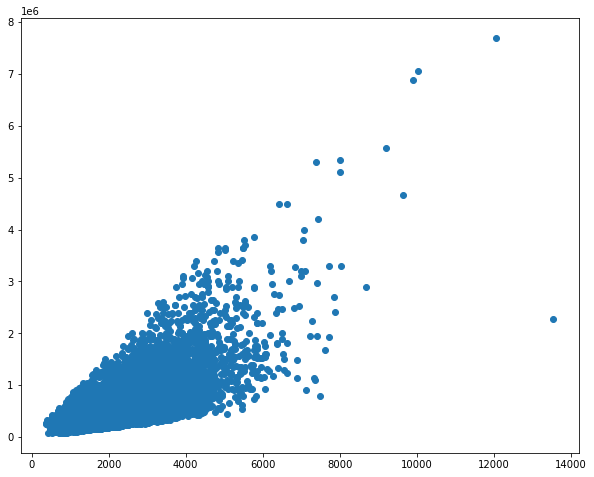

In [72]:
plt.figure(figsize=(10,8))
plt.scatter(df.sqft_living, df.price)

<Figure size 432x288 with 0 Axes>

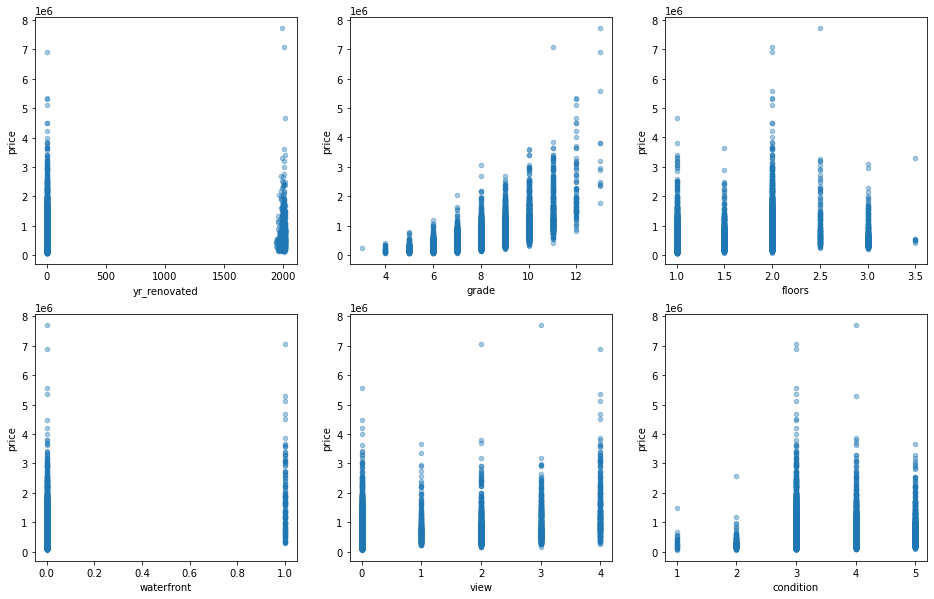

In [56]:
plt.clf()
inspect = ['yr_renovated', 'grade', 'floors', 'waterfront', 'view', 'condition']
# create 2 rows of 3 
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize =(16,10))
index = 0
for row in range(axes.shape[0]):
    for col in range(axes.shape[1]):
        df.plot(kind='scatter', x=inspect[index], y='price', ax = axes[row,col], alpha=0.4)
        index += 1

In [57]:
categorical = ['floors', 'waterfront', 'view', 'condition', 'grade']
X = ['date', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']

'\nissue, first plot not shown\nhttps://github.com/mwaskom/seaborn/issues/2260\n'

<Figure size 432x288 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

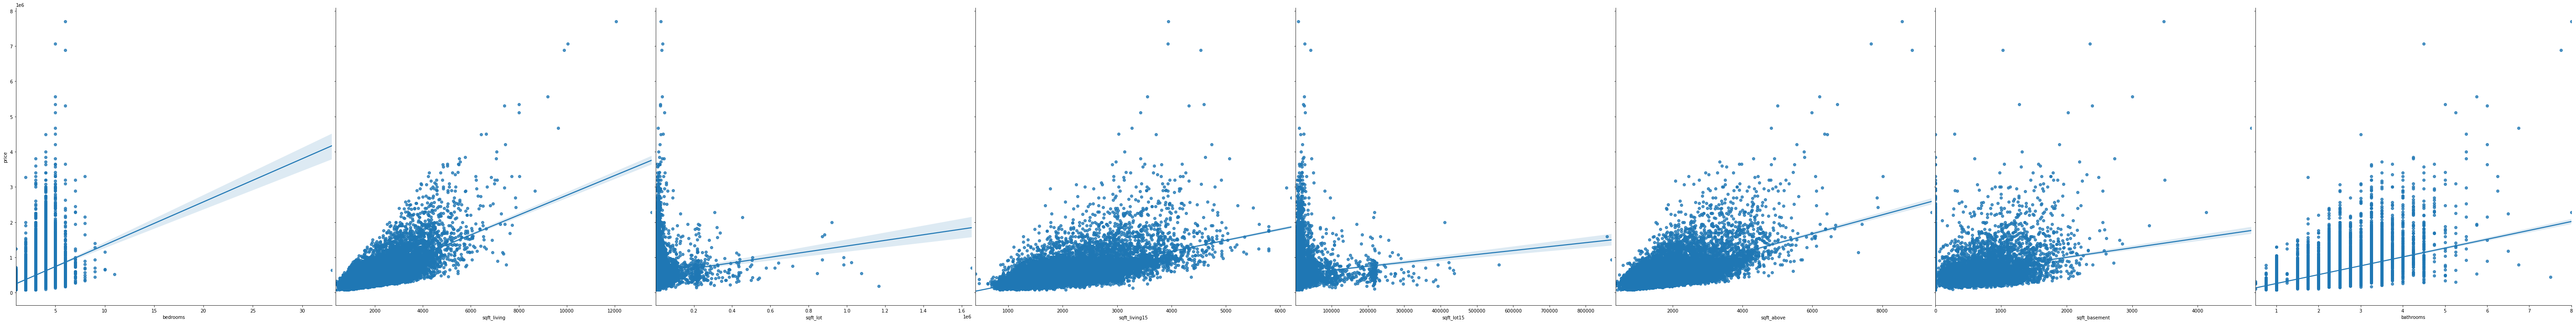

In [58]:
plt.clf()
plt.figure(figsize=(15,10)) # sns.set(rc={'figure.figsize':(20,15)})
sns.pairplot(df, x_vars=['bedrooms','sqft_living', 'sqft_lot', 'sqft_living15', 
                         'sqft_lot15', 'sqft_above', 'sqft_basement','bathrooms'], 
             y_vars='price', kind='reg', height =10, diag_kind=None)

"""
issue, first plot not shown
https://github.com/mwaskom/seaborn/issues/2260
"""


In [80]:
# remove outliers 
print(len(df[df.bedrooms>9]))
print(len(df[df.sqft_living>10000]))
print(len(df[df.sqft_lot15 > 500000]))
print(len(df[df.bathrooms > 7]))
print(len(df[df.floors > 3]))

df = df[df.bedrooms < 10]
df = df[df.floors < 3.5]
df = df[df.sqft_living < 10000]
df = df[df.sqft_lot15 <= 500000]
df = df[df.bathrooms <= 7]

print(len(df))
print(len(df_2))

# df_2 = df[]

0
0
0
0
7
21577
21593


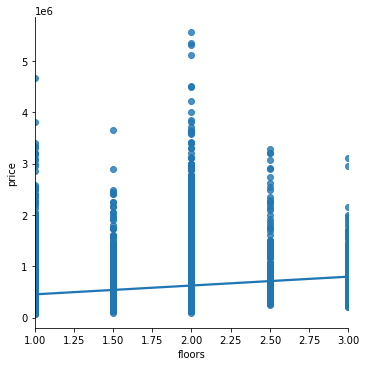

In [81]:
sns.lmplot(x='floors', y='price', fit_reg=True, data=df)

<Figure size 432x288 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

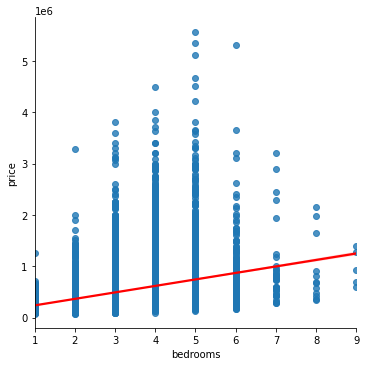

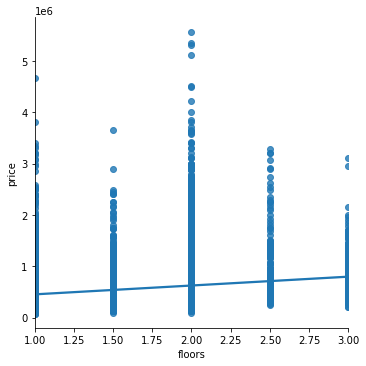

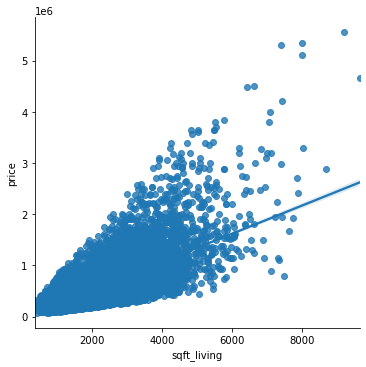

In [82]:
plt.clf()
plt.figure(figsize=(20,15))
sns.lmplot(x='bedrooms', y='price', fit_reg=True, data=df, line_kws={'color': 'red'})
sns.lmplot(x='floors', y='price', fit_reg=True, data=df)
sns.lmplot(x='sqft_living', y='price', fit_reg=True, data=df)

<Figure size 432x288 with 0 Axes>

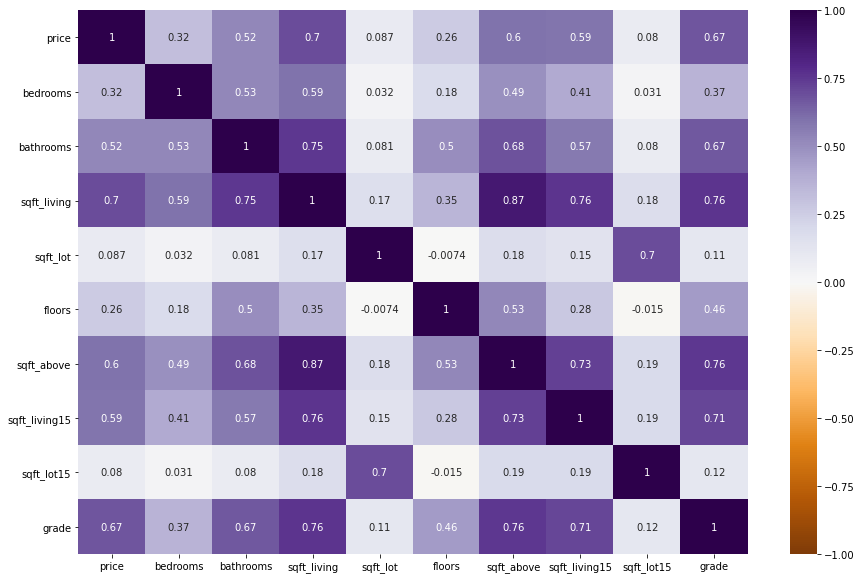

In [83]:
"""pairplot of the variables with price, before removing outliers"""

plt.clf()
plt.figure(figsize=(15,10))
continuous = ['price','bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'sqft_above', 'sqft_basement',
              'sqft_living15', 'sqft_lot15', 'grade']
corr_grid = df[continuous].corr()
sns.heatmap(corr_grid, xticklabels=corr_grid.columns, yticklabels=corr_grid.columns, vmin=-1, center=0, vmax=1, cmap='PuOr', annot=True)
plt.show()

<Figure size 432x288 with 0 Axes>

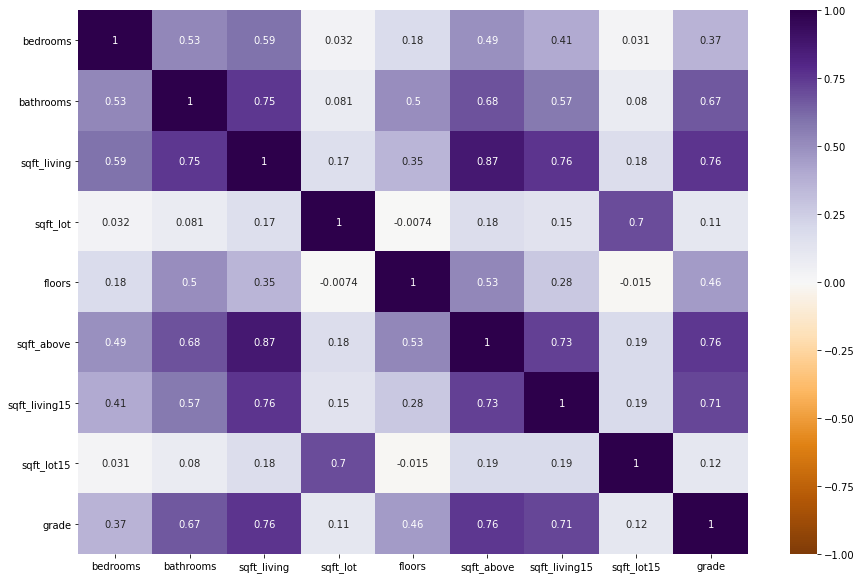

In [85]:
plt.clf()
plt.figure(figsize=(15,10))
continuous = ['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'sqft_above', 'sqft_basement',
              'sqft_living15', 'sqft_lot15', 'grade']
corr_grid = df[continuous].corr()
sns.heatmap(corr_grid, xticklabels=corr_grid.columns, yticklabels=corr_grid.columns, vmin=-1, center=0, vmax=1, cmap='PuOr', annot=True)
plt.show()

In [86]:
# print out the list of variables that are highly correlated - use codecademy 

corr_df=df[continuous].corr().abs().stack().reset_index().sort_values(0, ascending=False)
corr_df['pairs'] = list(zip(corr_df.level_0, corr_df.level_1))
corr_df.set_index(['pairs'], inplace=True)
corr_df.drop(columns=['level_1', 'level_0'], inplace = True)
corr_df.columns = ['cc']
corr_df.drop_duplicates(inplace=True)
# corr_df[(corr_df.cc>.75) & (corr_df.cc <1)]

"""
# save absolute value of correlation matrix as a data frame
# converts all values to absolute value
# stacks the row:column pairs into a multindex
# reset the index to set the multindex to seperate columns
# sort values. 0 is the column automatically generated by the stacking



# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df['pairs'] = list(zip(df.level_0, df.level_1))

# set index to pairs
df.set_index(['pairs'], inplace = True)

#d rop level columns
df.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df.columns = ['cc']

# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
df.drop_duplicates(inplace=True)
df[(df.cc>.75) & (df.cc <1)]
"""

'\n# save absolute value of correlation matrix as a data frame\n# converts all values to absolute value\n# stacks the row:column pairs into a multindex\n# reset the index to set the multindex to seperate columns\n# sort values. 0 is the column automatically generated by the stacking\n\n\n\n# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"\ndf[\'pairs\'] = list(zip(df.level_0, df.level_1))\n\n# set index to pairs\ndf.set_index([\'pairs\'], inplace = True)\n\n#d rop level columns\ndf.drop(columns=[\'level_1\', \'level_0\'], inplace = True)\n\n# rename correlation column as cc rather than 0\ndf.columns = [\'cc\']\n\n# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.\n# for the sake of exercise, kept it in.\ndf.drop_duplicates(inplace=True)\ndf[(df.cc>.75) & (df.cc <1)]\n'

In [87]:
corr_df[(corr_df.cc>.75) & (corr_df.cc <1)]

,cc
pairs,
"(sqft_above, sqft_living)",0.874621
"(grade, sqft_living)",0.764151
"(sqft_living, sqft_living15)",0.759113
"(grade, sqft_above)",0.756045
"(bathrooms, sqft_living)",0.754029


In [ ]:
df.bathrooms.unique()
# maybe round the bathrooms 
print(len(df[df.bathrooms >= 3]))
len(df[df.bathrooms < 3])

df.groupby('bathrooms').price.mean()/100000

237375.00000006513 [  57561.64788726  109697.08205654  384397.22222216  172054.69619371
  217540.80150913  220530.00362687  296393.81582797  316428.30742043
  422975.53080163  471286.89907033  733378.24448211  695026.66757858
  960803.90322575 1031030.34558819 1289278.16455689 1096835.60999993
 1784924.56521733 1436791.6666666  1580586.53846148 2285124.99999994
 2255124.99999994 2710958.33333327 2857624.9999999  1472624.9999999
 2497624.9999999   212624.99999994 6652624.99999989 4752624.9999999 ]


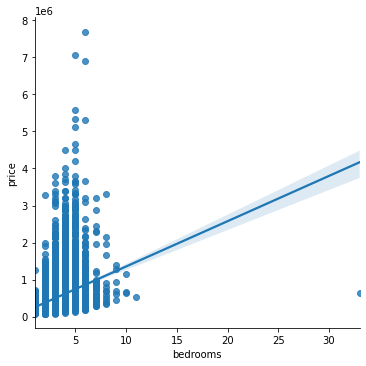

In [29]:
model = sm.OLS.from_formula('price ~ bathrooms', df).fit()
model.params

bathrooms_dummies = pd.get_dummies(df.bathrooms, prefix='bath', drop_first=True)
bathrooms_dummies.head()

regr=LinearRegression()
regr.fit(bathrooms_dummies, df.price)
print(regr.intercept_, regr.coef_)

# do SLR on these to see which are most correlated wth price 
slr_explore = ['bedrooms', 'bathrooms', 'sqft_living','sqft_lot', 
               'floors', 'condition', 'grade', 'sqft_above', 'sqft_basement', 
               'yr_built', 'sqft_living15', 'sqft_lot15']


# do it for the first variable 
model = sm.OLS.from_formula('price ~ bedrooms', data=df).fit()
model.rsquared # grabs the rsquared value 

In [30]:
# loop through all of slr explore and order by highest r squared value 
slr_dict = {}
for col in slr_explore: 
    temp_model = sm.OLS.from_formula('price ~ {}'.format(col), data=df).fit()
    temp_rsquared = temp_model.rsquared
    slr_dict[col] = temp_rsquared
slr_df = pd.DataFrame.from_dict(slr_dict,orient='index').reset_index()
slr_df.columns = ['feature','rsquared']
slr_df.sort_values(by='rsquared',ascending=False,inplace=True) 
slr_df.reset_index(drop=True,inplace=True)
slr_df

,feature,rsquared
0,sqft_living,0.492688
1,grade,0.446158
2,sqft_above,0.366470
3,sqft_living15,0.342507
4,bathrooms,0.276577
5,sqft_basement,0.105630
6,bedrooms,0.095350
7,floors,0.065948
8,sqft_lot,0.008078
9,sqft_lot15,0.006863


In [132]:
model = sm.OLS.from_formula('price ~ sqft_living', df).fit()
model.params

Intercept     -43988.892194
sqft_living      280.863014
dtype: float64

(array([1.0000e+00, 1.0000e+00, 3.0000e+00, 2.0000e+00, 2.3000e+01,
        7.2000e+01, 3.9500e+02, 2.5800e+03, 1.0166e+04, 8.3540e+03]),
 array([-3745356.32222493, -3376776.73231429, -3008197.14240366,
        -2639617.55249302, -2271037.96258238, -1902458.37267174,
        -1533878.78276111, -1165299.19285047,  -796719.60293983,
         -428140.01302919,   -59560.42311856]),
 <BarContainer object of 10 artists>)

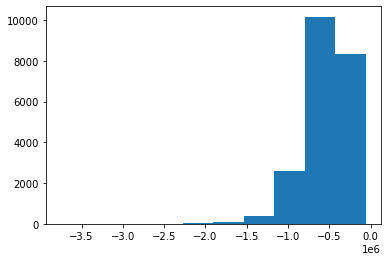

In [133]:
fitted_values = model.predict()
residuals = df.sqft_living - fitted_values 
plt.hist(residuals)

<Figure size 432x288 with 0 Axes>

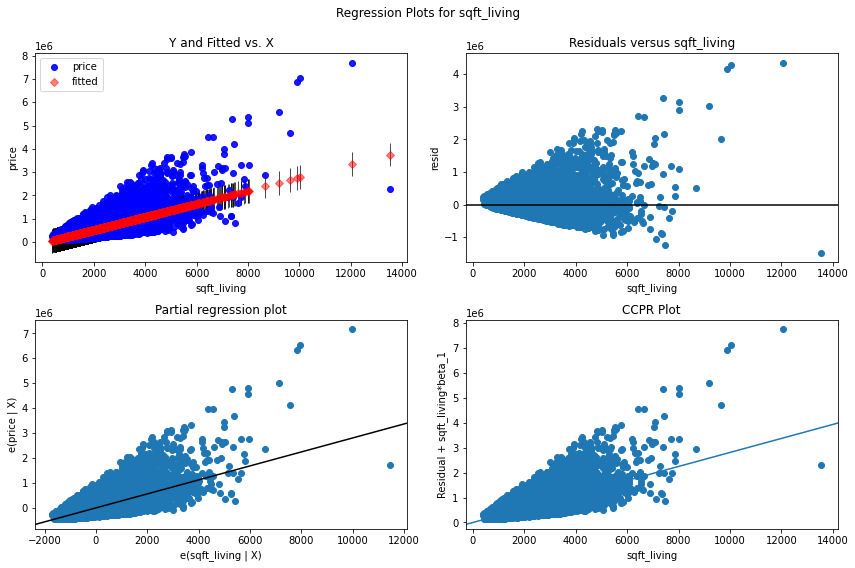

In [136]:
# homoskedasticity 
plt.clf()
fig=plt.figure(figsize=(12,8))
fig=sm.graphics.plot_regress_exog(model,'sqft_living',fig=fig)

(array([4.000e+00, 1.000e+00, 1.700e+01, 3.400e+01, 1.140e+02, 3.990e+02,
        1.544e+03, 5.070e+03, 9.967e+03, 4.444e+03]),
 array([-2753992.38619589, -2484786.00417372, -2215579.62215156,
        -1946373.2401294 , -1677166.85810723, -1407960.47608507,
        -1138754.0940629 ,  -869547.71204074,  -600341.33001857,
         -331134.94799641,   -61928.56597425]),
 <BarContainer object of 10 artists>)

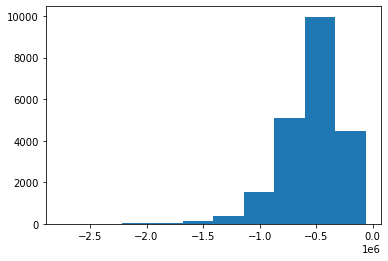

In [150]:
model = sm.OLS.from_formula('price ~ sqft_living', df).fit()
fitted_values = model.predict()
residuals = df.sqft_living - fitted_values 
plt.hist(residuals)

In [151]:
df['sqft_living_log'] = np.log(df.sqft_living)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_living_log
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,7.073270
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,7.851661
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,6.646391
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,7.580700
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,7.426549


(array([  22.,  158.,  993., 3512., 6099., 5938., 3459., 1217.,  179.,
          15.]),
 array([-1406076.43413487, -1233199.12183725, -1060321.80953963,
         -887444.497242  ,  -714567.18494438,  -541689.87264676,
         -368812.56034914,  -195935.24805151,   -23057.93575389,
          149819.37654373,   322696.68884135]),
 <BarContainer object of 10 artists>)

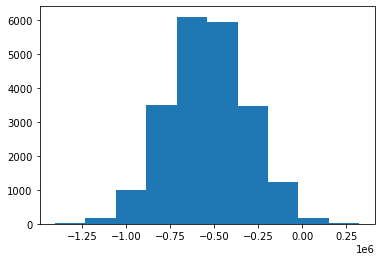

In [177]:
model = sm.OLS.from_formula('price ~ sqft_living_log', df).fit()
fitted_values = model.predict()
residuals = df.sqft_living - fitted_values 
plt.hist(residuals)

<Figure size 432x288 with 0 Axes>

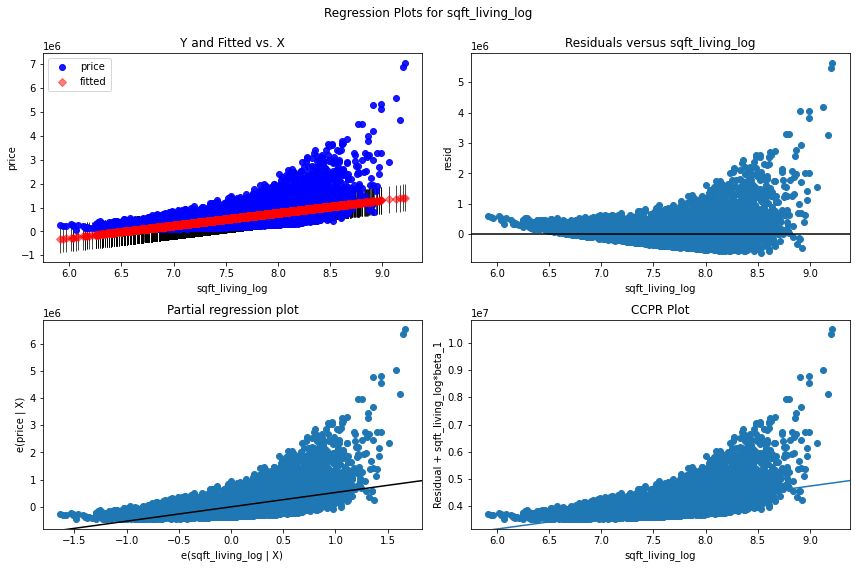

In [179]:
plt.clf()
fig=plt.figure(figsize=(12,8))
fig=sm.graphics.plot_regress_exog(model,'sqft_living_log',fig=fig)